In [92]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import filtfilt, spectrogram, butter, lfilter
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [93]:
# Data processing
sample_rate, audio_data = wavfile.read('f04.wav')

# If stereo, take only one channel
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# Normalize audio data
audio_data = audio_data / np.max(np.abs(audio_data))  

In [94]:
print("Original Audio:")
display(Audio(audio_data, rate=sample_rate))

Original Audio:


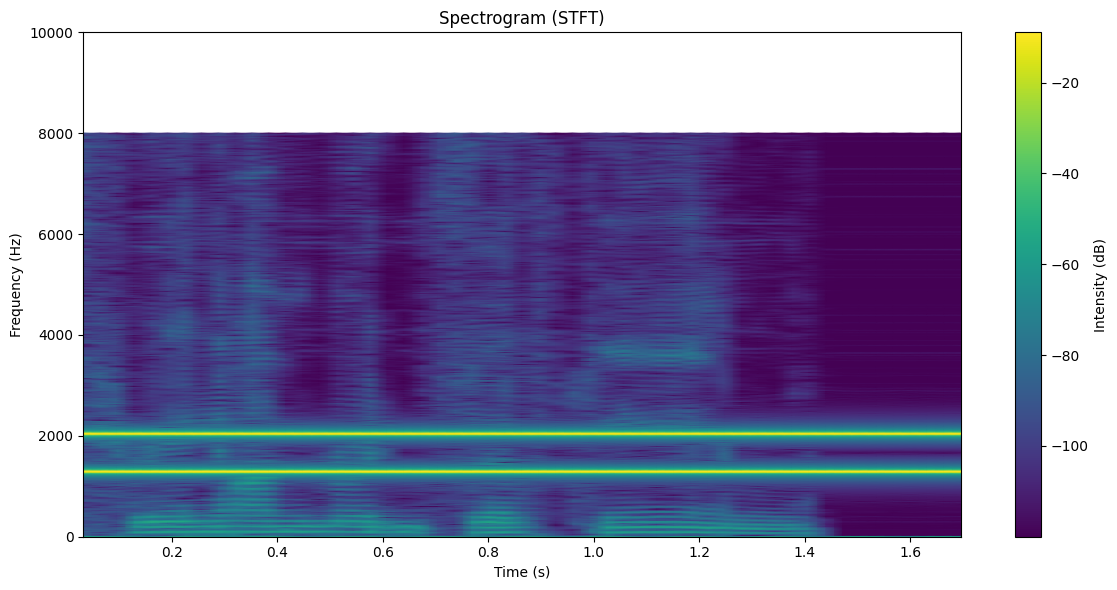

In [95]:
nperseg = 1024  
noverlap = 512  
freqs, times, Sxx = spectrogram(
    audio_data, 
    fs=sample_rate,
    window='hann', # window type 
    nperseg=nperseg, # number of sampel per segmant
    noverlap=noverlap, # number of point that are overlabed (defualt nperseg // 2)
    scaling='spectrum'  
)

Sxx_db = 10 * np.log10(Sxx + 1e-12)  


plt.figure(figsize=(12, 6))
plt.pcolormesh(times, freqs, Sxx_db, shading='gouraud', cmap='viridis')
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram (STFT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 10000) 
plt.tight_layout()
plt.show()

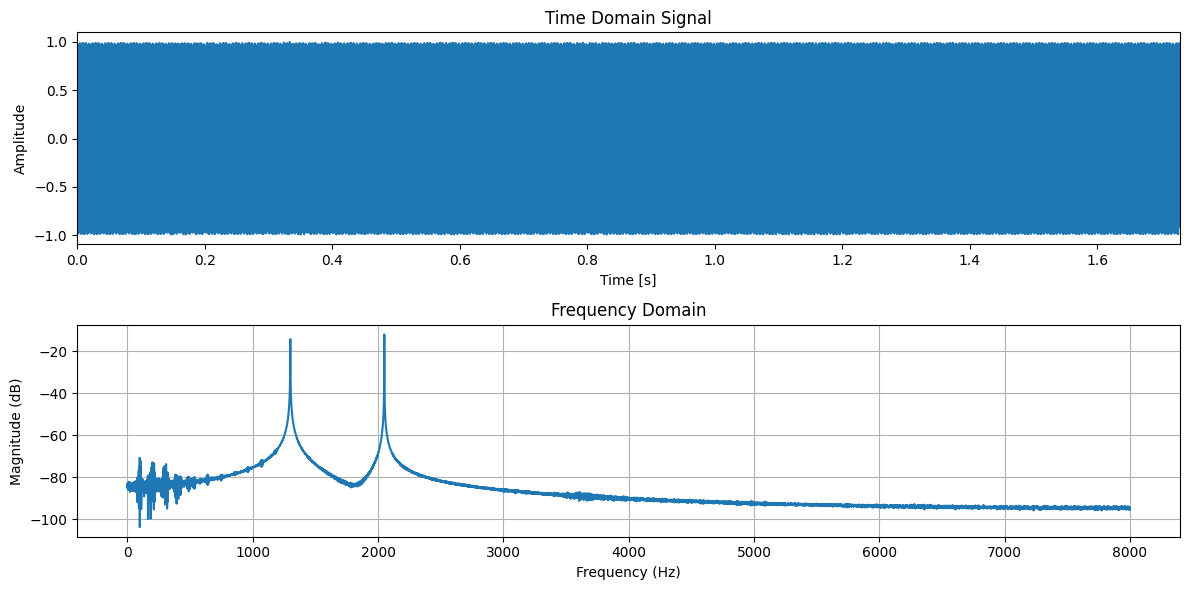

In [96]:
# Initial signal analysis
# Time Domain Plot
# Get the time domain
duration = np.arange(len(audio_data)) / sample_rate

# Plot the time domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(duration, audio_data)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, duration[-1])

# Frequency domain 
plt.subplot(2, 1, 2)
n = len(audio_data)

# Transforming to frequency domain
# Use
freq = np.fft.rfftfreq(n, d=1/sample_rate) 
fft_result = np.fft.rfft(audio_data) 
magnitude = np.abs(fft_result) / n  
magnitude_db = 20 * np.log10(magnitude + 1e-12) 

plt.plot(freq, magnitude_db)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
# Remove none human speech frequencies
# Low-pass filter design
def lowpass_filter(data, cutoff, fs, order=5):
    # Normalize the cut-off frequency
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # Apply the filter
    y = lfilter(b, a, data)
    return y

# Apply low-pass filter
cutoff_hz = 4000  # human speech frequency range
audio_data = lowpass_filter(audio_data, cutoff_hz, sample_rate, order=6)

In [98]:
def bandstop_filter(data, low_cutoff, high_cutoff, fs, order=4):
    # Normalize the cutoff frequencies to the Nyquist frequency
    nyq = 0.5 * fs
    low = low_cutoff / nyq
    high = high_cutoff / nyq
    
    # Design the Butterworth band-stop filter
    b, a = butter(
        N=order, 
        Wn=[low, high], 
        btype='bandstop', 
        analog=False
    )
    
    # Apply the filter
    y = filtfilt(b, a, data)
    
    return y

audio_data = bandstop_filter(audio_data, 1900, 2200, sample_rate, order=4)
audio_data = bandstop_filter(audio_data, 1200, 1400, sample_rate, order=4)

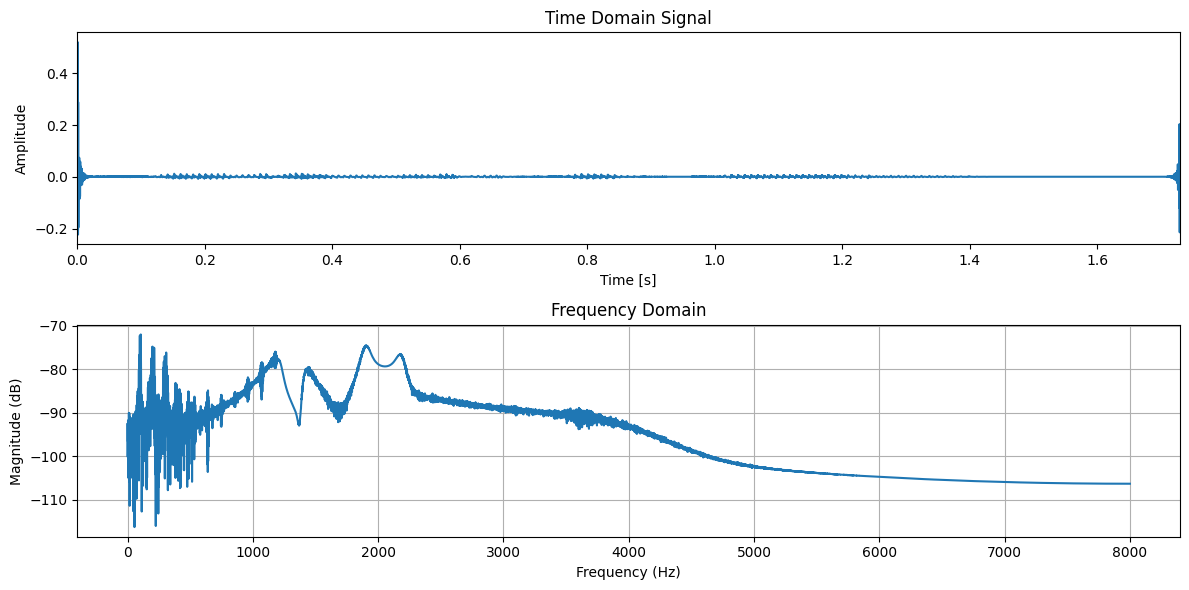

In [99]:
# After performing filtering
# Time Domain Plot
# Get the time domain
duration = np.arange(len(audio_data)) / sample_rate

# Plot the time domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(duration, audio_data)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, duration[-1])

# Frequency domain 
plt.subplot(2, 1, 2)
n = len(audio_data)

# Transforming to frequency domain
# Use
freq = np.fft.rfftfreq(n, d=1/sample_rate) 
fft_result = np.fft.rfft(audio_data) 
magnitude = np.abs(fft_result) / n  
magnitude_db = 20 * np.log10(magnitude + 1e-12) 

plt.plot(freq, magnitude_db)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.grid(True)
plt.tight_layout()
plt.show()


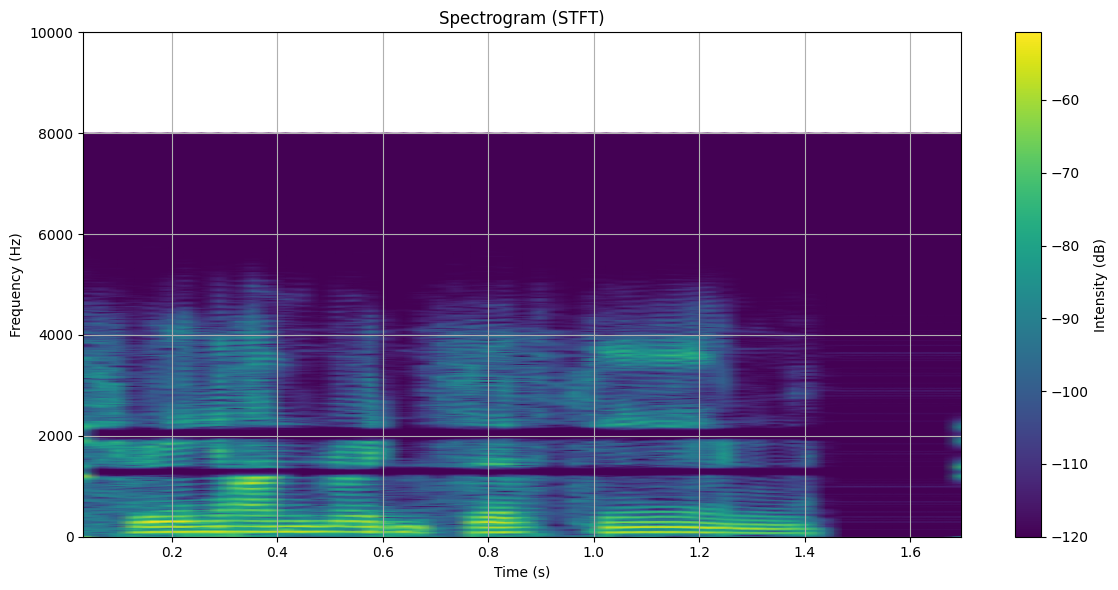

In [100]:
nperseg = 1024  
noverlap = 512  
freqs, times, Sxx = spectrogram(
    audio_data, 
    fs=sample_rate,
    window='hann', # window type 
    nperseg=nperseg, # number of sampel per segmant
    noverlap=noverlap, # number of point that are overlabed (defualt nperseg // 2)
    scaling='spectrum'  
)

Sxx_db = 10 * np.log10(Sxx + 1e-12)  


plt.figure(figsize=(12, 6))
plt.pcolormesh(times, freqs, Sxx_db, shading='gouraud', cmap='viridis')
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram (STFT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 10000)

plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
print("Final Audio:")
display(Audio(audio_data, rate=sample_rate))

Final Audio:
